In [55]:
import numpy as np 
import matplotlib.pyplot as plt
 
def carry(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)

	return state[0], state[1]

def one_step_1(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T2R2T1R1
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_3(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r1T2R2T1r1   r1=sqrt(R1)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_5(state, theta):
	'''
	conventional quantum walk with boundary
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack([up_state, down_state, aux_state])
	return state


def N_step_1(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_1(state, theta_1, theta_2)
	return state

def N_step_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2(state, theta_1, theta_2)
	return state

def N_step_3(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_3(state, theta_1, theta_2)
	return state

def N_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_4(state, theta_1, theta_2)
	return state

def N_step_5(state, theta, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_5(state, theta)
	return state


# 初态为$\frac{1}{\sqrt(2)}$(|0,up>-i|1,down>)后P0+P1

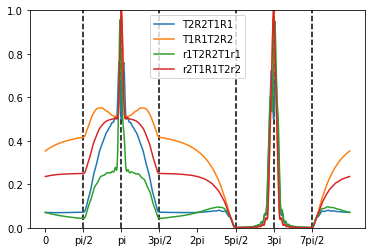

In [2]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1/np.sqrt(2)
down_state[1]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [37]:
M = 200
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[3]= 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(-2*np.pi,2*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta_2, theta, N=51)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] 
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=51)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0]  

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta_2, theta, N=51)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] 

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=51)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] 


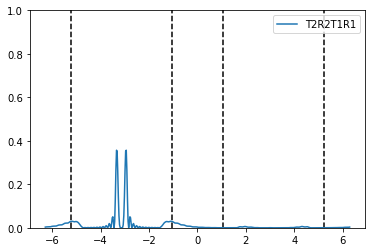

In [40]:
plt.plot(theta_1, p2, label = 'T2R2T1R1')
# plt.plot(theta_1, p2, label = 'T1R1T2R2')
# plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
# plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)

plt.vlines(np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(-5*np.pi/3, 0, 1, linestyles = "dashed")
plt.legend()

In [9]:
M = 200
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1/np.sqrt(3)
down_state[1]=-1j/np.sqrt(3/2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(-2*np.pi,2*np.pi,501)
theta_2 = np.pi/3
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta_2, theta, N=150)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=150)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta_2, theta, N=150)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=150)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 


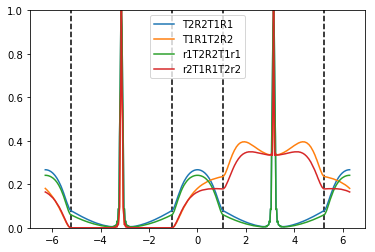

In [12]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)

plt.vlines(np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/3, 0, 1, linestyles = "dashed")
plt.vlines(-5*np.pi/3, 0, 1, linestyles = "dashed")
plt.legend()

## 行走顺序T2R2T1R1

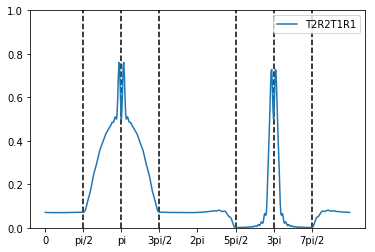

In [3]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

## 行走顺序T1R1T2R2

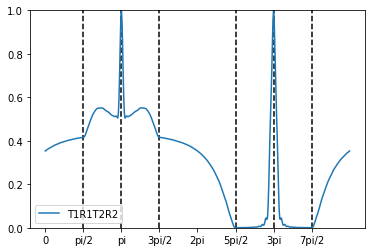

In [4]:
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

## 行走顺序r1T2R2T1r1

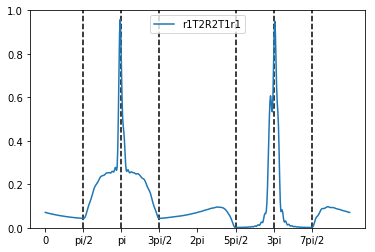

In [5]:
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

## 行走顺序r2T1R1T2r2

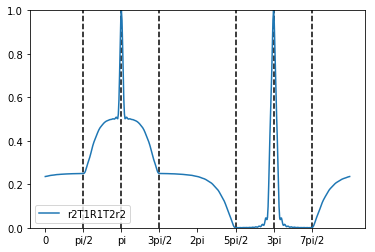

In [6]:
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best')

## 顺序为T2R2T1R1，P0+P1+P2的概率

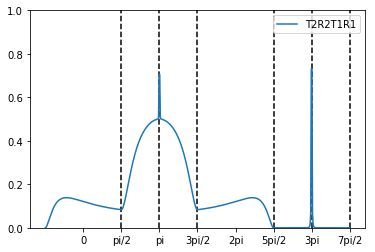

In [11]:
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=500)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

## 顺序为r1T2R2T1r1，P0+P1+P2的概率

In [61]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
p1 = np.zeros(501)
theta_2 = np.pi/2
for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p[i] = P[0] + P[1] + P[2]
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

NameError: name 'p3' is not defined

# 初态为$\frac{1}{\sqrt(2)}$(|1,up>-i|0,down>)后P0+P1

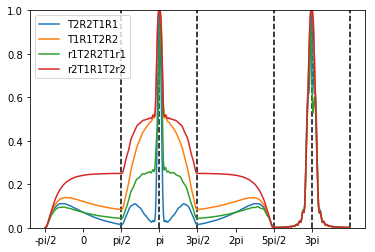

In [4]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(-np.pi/2,7/2*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] + P[2] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] + P[2]   

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [58]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
theta_1 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_2 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta_2, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 

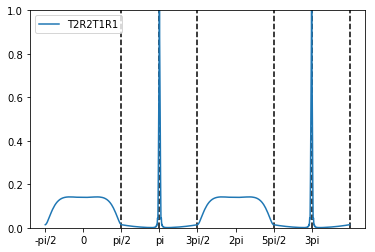

In [59]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [60]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
theta_1 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_2 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, -theta_2, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 

In [ ]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [50]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
theta_1 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_2 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, -theta_2, N=500)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 

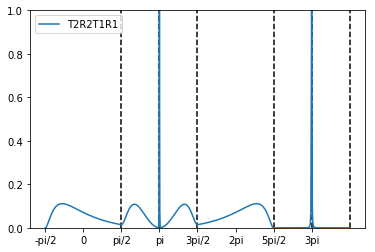

In [51]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

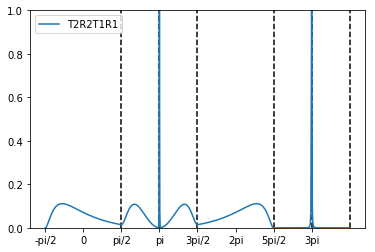

In [4]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

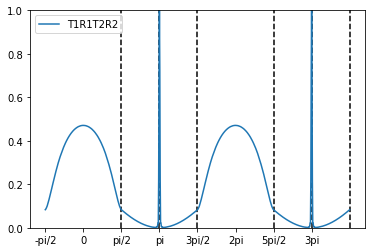

In [52]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta_1, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

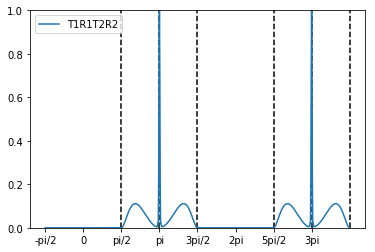

In [53]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, -theta_1, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

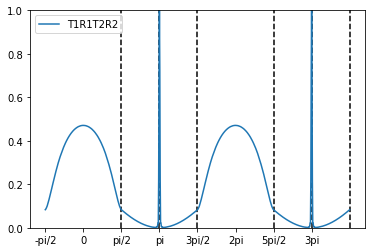

In [57]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = 3*np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta_1, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

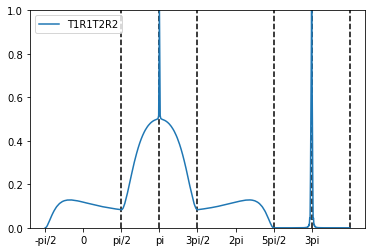

In [15]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta, theta_1, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

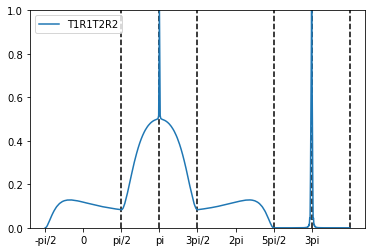

In [56]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta, -theta_1, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

## 电子入射，监控自旋 使用T1R1T2R2

### 制备初态

In [24]:
M = 1000
N = 500
n = 5
k =1
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
qiuhe = 0
for i in range(0,n):
    down_state[i] = np.exp(-k*1j)/np.sqrt(5)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))




### 50后结果

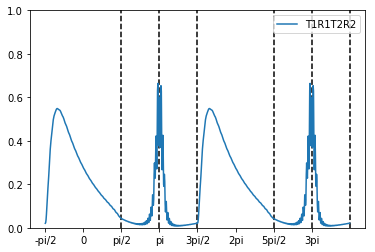

In [28]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta_1, theta, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] + P[2]
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

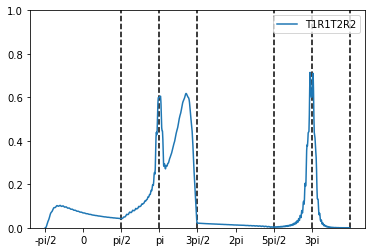

In [27]:
p1 = np.zeros(801)
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta, theta_1, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
plt.plot(theta_2, p1, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 


In [49]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 
M = 100
n = 1

def plot_func(n,theta_1,theta_2,m,k):
    n = int(n)
    up_state = [0]*M
    down_state = [0]*M
    aux_state = [0]*M
    qiuhe = 0
    for i in range(0,int(m)):
        down_state[i] = np.exp(-k*1j)/np.sqrt(m)
    np.array(up_state)
    np.array(down_state)
    np.array(aux_state)
    init_state = np.vstack((up_state, down_state, aux_state))
    state = N_step_2(init_state, theta_1, theta_2, N=n)
    P = abs(state[0])**2 + abs(state[1])**2 
    phonon = np.arange(0, len(P)) 
    plt.bar(phonon ,P) 
    plt.xlim(0,50)
    plt.ylim(0,1)

interact(plot_func, n = widgets.FloatSlider(value=50, 
               min=0, 
               max=89, 
               step=1),theta_1=widgets.FloatSlider(value=np.pi/2, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.05*np.pi),theta_2=widgets.FloatSlider(value=np.pi, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01),m=widgets.FloatSlider(value=5, 
               min=0, 
               max=10, 
               step=1),k=widgets.FloatSlider(value=7, 
               min=0, 
               max=10, 
               step=1)) 
plt.show()


interactive(children=(FloatSlider(value=50.0, description='n', max=89.0, step=1.0), FloatSlider(value=1.570796…

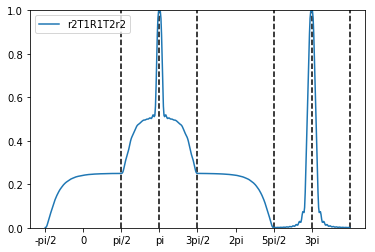

In [13]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1/np.sqrt(2)
down_state[1]=-1j/np.sqrt(2)
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta_1, theta, N=200)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 



# 测试non-trival区间

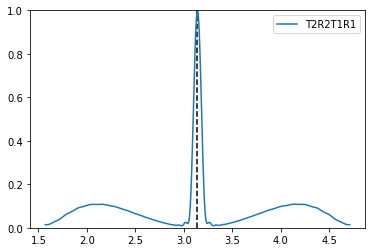

In [14]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(np.pi/2,3*np.pi/2,501)
theta_2 = np.pi/2
p_1 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p_1[i] = P[0] + P[1]

plt.plot(theta_1, p_1, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(np.pi/2,3*np.pi/2,np.pi/12) 
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

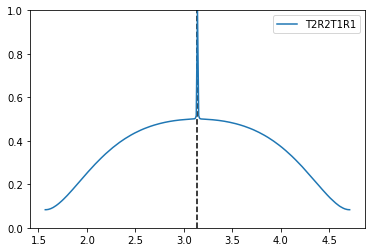

In [14]:
theta_1 = np.linspace(np.pi/2,3*np.pi/2,501)
theta_2 = np.pi/2
p_1 = np.zeros(501)
p_2 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=500)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p_2[i] = P[0] + P[1]

plt.plot(theta_1, p_2, label = 'T2R2T1R1')
plt.ylim(top = 1,bottom = 0)
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

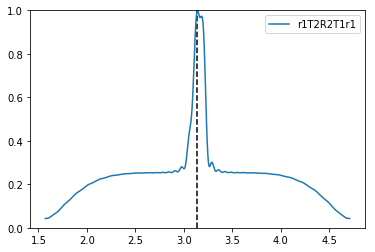

In [16]:
p_3 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p_3[i] = P[0] + P[1] + P[2]

plt.plot(theta_1, p_3, label = 'r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

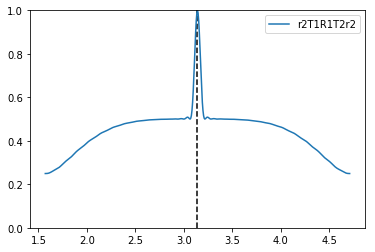

In [17]:
p_4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p_4[i] = P[0] + P[1] 

plt.plot(theta_1, p_4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 行走5步的结果

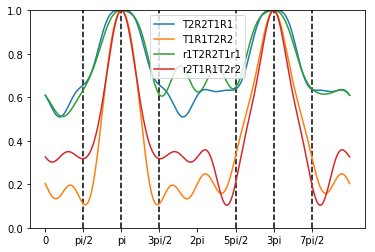

In [18]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2] 

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 行走10步

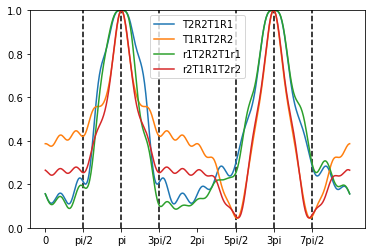

In [19]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1/np.sqrt(2)
down_state[1]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=10)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=10)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=10)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=10)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 初态为|0,down>

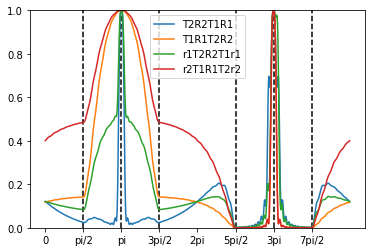

In [20]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

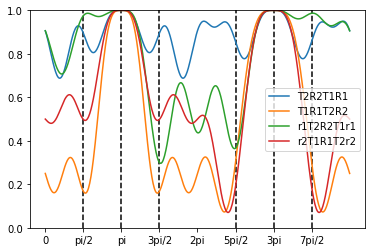

In [21]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=5)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

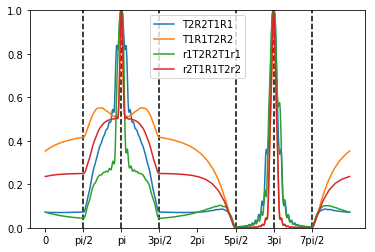

In [22]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1/np.sqrt(2)
down_state[1]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(0,4*np.pi,501)
theta_2 = -np.pi/2
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] + P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(0,4*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

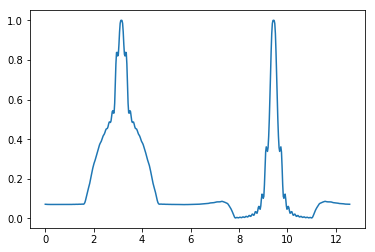

In [23]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')

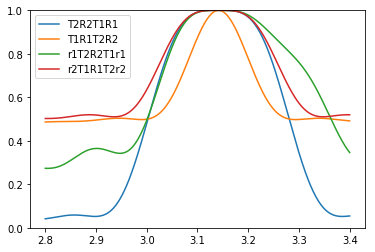

In [24]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(2.8,3.4,501)
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] ++ P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] + P[2]

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
plt.legend(loc='best') 

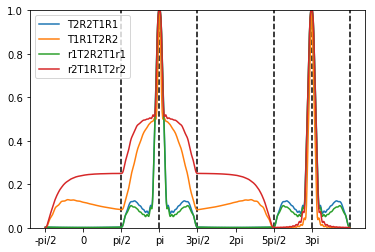

In [25]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0]=-1j/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(-np.pi/2,7*np.pi/2,501)
p1 = np.zeros(501)
p2 = np.zeros(501)
p3 = np.zeros(501)
p4 = np.zeros(501)
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta_2, theta, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
    
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] 

for i,theta in enumerate(theta_1):
    state = N_step_3(init_state, theta_2, theta, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p3[i] = P[0] + P[1] ++ P[2]

for i,theta in enumerate(theta_1):
    state = N_step_4(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p4[i] = P[0] + P[1] + P[2]

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.plot(theta_1, p2, label = 'T1R1T2R2')
plt.plot(theta_1, p3, label = 'r1T2R2T1r1')
plt.plot(theta_1, p4, label = 'r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
plt.legend(loc='best') 
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

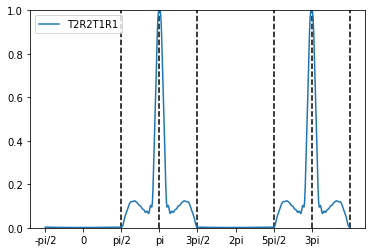

In [26]:
plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.legend(loc='best') 
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

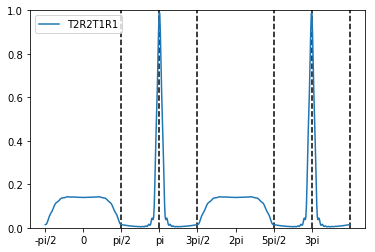

In [27]:
theta_2 = np.pi/2
for i,theta in enumerate(theta_1):
    state = N_step_1(init_state, theta_2, theta, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.legend(loc='best') 
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

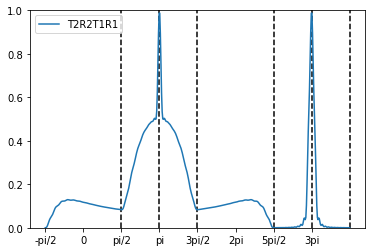

In [28]:
theta_2 = np.pi/2
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] 

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.legend(loc='best') 
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

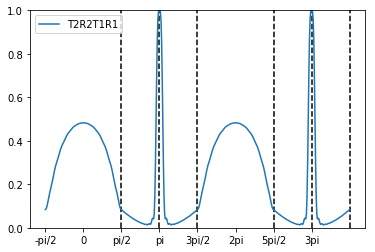

In [29]:
theta_2 = np.pi/2
for i,theta in enumerate(theta_1):
    state = N_step_2(init_state, theta_2, theta, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]

plt.plot(theta_1, p1, label = 'T2R2T1R1')
plt.legend(loc='best') 
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# CONVENTIONAL QUANTUM WALK WITH BOUNDARY

In [15]:
M = 100
n = 1
N = 50
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta = np.pi
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
state = N_step_5(init_state, theta, N=50)
P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 
theta_2=np.pi/4
a = np.sqrt(4-2*np.sqrt(2))
M = 200
N = 100
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

plt.figure()

def plot_func(n,theta):
    n = int(n)
    state = N_step_5(init_state, theta ,N=n)
    P = state[1]
    phonon = np.arange(0, len(P)) 
    plt.bar(phonon ,P) 
    plt.xlim(0,50)

interact(plot_func, n = widgets.FloatSlider(value=0, 
               min=0, 
               max=89, 
               step=1),theta = widgets.FloatSlider(value=np.pi, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.05*np.pi)) 
plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='n', max=89.0, step=1.0), FloatSlider(value=3.1415926…

In [17]:
state = N_step_5(init_state, np.pi ,N=1)
print(state[0][0],state[1][0],state[0][1],state[1][1])

-1.22464679915e-16 -3.74939945665e-33 1.0 0.0


In [33]:
-1/np.log(np.sqrt(2)-1)

1.1345926571065112

In [55]:
arr1 = [1, 2, 3]
arr2 = [4, 5, 6]
res = np.vstack([[1, 2, 3], [4, 5, 6]])
res[0][1]

2